---

# Lecture 8.1 Decision and Regression Trees

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Decision trees tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. There are two stages to prediction. The first stage is training the model—this is where the tree is built, tested, and optimized by using an existing collection of data. In the second stage, you actually use the model to predict an unknown outcome.

Decision trees are constructed from only two elements — nodes and branches.

<img src="Decision_Tree_Example1.jpeg" alt="Drawing" style="width: 500px;"/>

This image was taken directly from this [article.](https://betterdatascience.com/mml-decision-trees/)


The nodes shown above fall under the following types of nodes:

* Root node — node at the top of the tree. This node acts as the input node for feature vectors in the model. 
* Decision nodes — nodes where the variables are evaluated. These nodes have arrows pointing to them and away from them
* Leaf nodes — final nodes at which the prediction is made

---

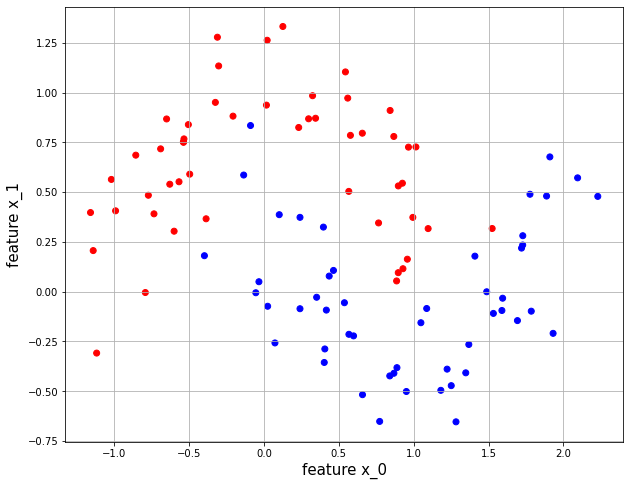

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

X, y = make_moons(noise = 0.20, random_state=3)
colors = ["red" if label == 0 else "blue" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

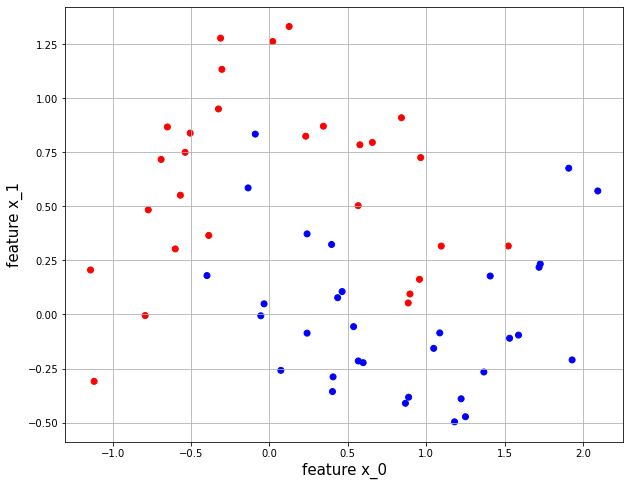

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [3]:
features = ["x_0", "x_1"]
labels = ["red", "blue"]

In [4]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

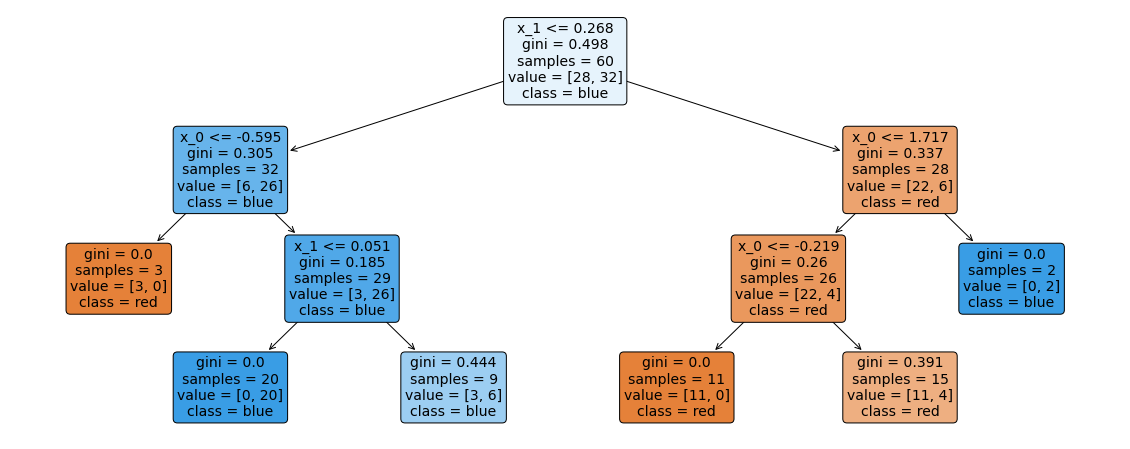

In [5]:
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

In [6]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_1 <= 0.27
|   |--- x_0 <= -0.60
|   |   |--- class: 0
|   |--- x_0 >  -0.60
|   |   |--- x_1 <= 0.05
|   |   |   |--- class: 1
|   |   |--- x_1 >  0.05
|   |   |   |--- class: 1
|--- x_1 >  0.27
|   |--- x_0 <= 1.72
|   |   |--- x_0 <= -0.22
|   |   |   |--- class: 0
|   |   |--- x_0 >  -0.22
|   |   |   |--- class: 0
|   |--- x_0 >  1.72
|   |   |--- class: 1



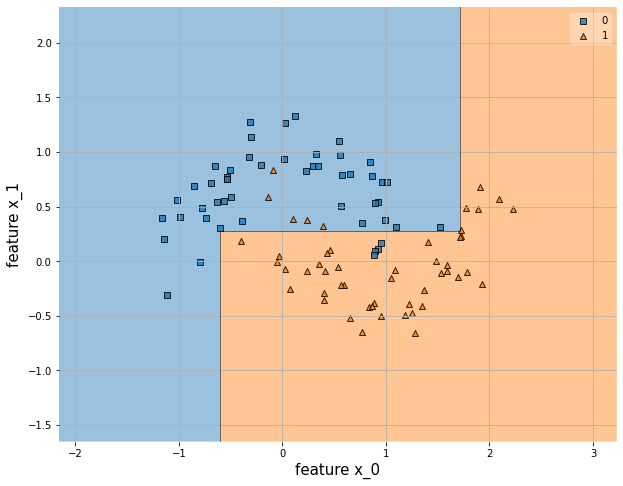

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

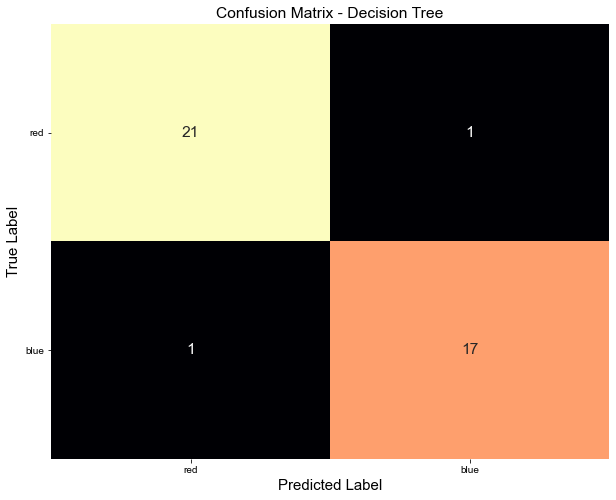

In [8]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

In [9]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

